# Homework 2

# Theory Problems

## Linear Regression for one Variable
**a) Find the derivative of the mean square error with respect to $\theta$**

$$
    MSE = \frac{1}{N}\sum_{n=1}^{N}(\hat{y}_{n} -y_{n})^2
$$
Replace $\hat{y}_{n} = \theta x_n$
$$
\implies    MSE = \frac{1}{N}\sum_{n=1}^{N}(\theta x_n -y_{n})^2
$$
Expand
$$
\implies    MSE = \frac{1}{N}\sum_{n=1}^{N}(\theta^{2} x^{2}_{n} - 2\theta x_{n}y +y^{2}_{n})
$$
Differentiating w.r.t $\theta$
$$
\implies    \frac{\partial MSE}{\partial \theta} = \frac{1}{N}\sum_{n=1}^{N}(2\theta x^{2}_{n} - 2x_{n}y)
$$
$$
\implies    \frac{\partial MSE}{\partial \theta} = -\frac{2}{N}\sum_{n=1}^{N}x_n(y - \theta x_{n})
$$

**b) Using your answer from (a), the find the optimum value of $\theta$**

$$ \implies \frac{\partial MSE}{\partial \theta} = -\frac{2}{N}\sum_{n=1}^{N}x_n(y - \theta x_{n}) = 0 $$

$$\implies -\frac{2}{N}\sum_{n=1}^{N}x_n(y - \theta x_{n}) = 0 $$

$$ \implies x_n(y - \theta x_{n}) = 0 $$

$$ \implies y = \theta x_{n} $$

$$ \implies \theta = \frac{y}{x_{n}} $$



## Derivation of the Normal Equations
**a)**

$$
\begin{bmatrix}
\hat{y}_1 \\
\hat{y}_2 \\ 
\vdots \\ 
\hat{y}_{N} 
\end{bmatrix} = \begin{bmatrix} 
x^{(1)}_1 & x^{(1)}_2 & \dots & x^{(1)}_K \\ 
x^{(2)}_1 & x^{(2)}_2 & \dots & x^{(2)}_K \\  
x^{(N)}_1 & x^{(N)}_2 & \dots  & x^{(N)}_K 
\end{bmatrix}\begin{bmatrix}
\theta_1 \\ 
\theta_2 \\ 
\vdots \\ 
\theta_{N} 
\end{bmatrix}
$$

Hence re-writing in vector form: <br>
$$\hat{y} = X\theta$$ <br>
where size: <br>
$\hat{y}$ = $N \times 1$ <br>
$X$ = $N \times K$ <br>
$\theta$ = $K \times 1$ <br>

**b)**
$$
Error = \begin{bmatrix}
y_1 - \hat{y}_1 \\
y_2 - \hat{y}_2 \\
\vdots \\
y_N - \hat{y}_N \\
\end{bmatrix} = \begin{bmatrix}
y_1 - (x^{(1)}_1\theta_{1} + x^{(1)}_2\theta_{2} + \dots + x^{(1)}_K\theta_{K}) \\
y_2 - (x^{(2)}_1\theta_{1} + x^{(2)}_2\theta_{2} + \dots + x^{(2)}_K\theta_{K}) \\
\vdots \\
y_N - (x^{(N)}_1\theta_{1} + x^{(N)}_2\theta_{2} + \dots + x^{(N)}_K\theta_{K}) \\
\end{bmatrix} = \begin{bmatrix}
y_1 - (X^{(1)}\theta) \\
y_2 - (X^{(2)}\theta) \\
\vdots \\
y_N - (X^{(N)}\theta) \\
\end{bmatrix}
$$

$$
MSE = \begin{bmatrix}
(y_1 - (X^{(1)}\theta))^2 \\
(y_2 - (X^{(2)}\theta))^2 \\
\vdots \\
(y_N - (X^{(N)}\theta))^2 \\
\end{bmatrix} = |y - X\theta|^2
$$

**c)**
Let $|X\theta - y|^2$ = $L$

$$ \implies L = (X\theta - y)^T(X\theta - y) $$
$$ \implies L = (X\theta)^T - y^T)(X\theta - y)  $$ 
$$ \implies L = (X\theta)^T(X\theta) - (X\theta)^Ty - y^T(X\theta) + y^Ty  $$ 
$$ \implies L = (X\theta)^T(X\theta) - 2(X\theta)^Ty + y^Ty  $$ 
$$ \implies L = y^Ty - 2(X\theta)^Ty + \theta^TX^TX\theta  $$ 
$$ \implies \frac{\partial{L}}{\partial{\theta}} = \frac{\partial{(y^Ty - 2(X\theta)^Ty + \theta^TX^TX\theta)}}{{\partial{\theta}}}  $$ 
$$ \implies \frac{\partial{L}}{\partial{\theta}} = 0 -2\frac{\partial{(\theta^T(X^Ty))}}{\partial{\theta}} + \frac{\partial{(\theta^T(X^TX)\theta)}}{\partial{\theta}} $$ 

Now using the given property: 
$\frac{\partial{X^TAX}}{\partial X} = 2X^TA = 2AX$
<br>
<br>

$$ \implies -2X^Ty + 2X^TX\theta = 0 $$ 
$$ \implies X^TX\theta = X^Ty $$ 
$$ \implies (X^TX)^{-1}(X^TX)\theta = (X^TX)^{-1}X^Ty $$ 
$$ \implies \theta = (X^TX)^{-1}X^Ty $$ 
$$

# Coding Problems

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn import metrics, svm
from sklearn.linear_model import LinearRegression, Perceptron, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, plot_confusion_matrix
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 100

## Polynomial Regression of Temperature Data

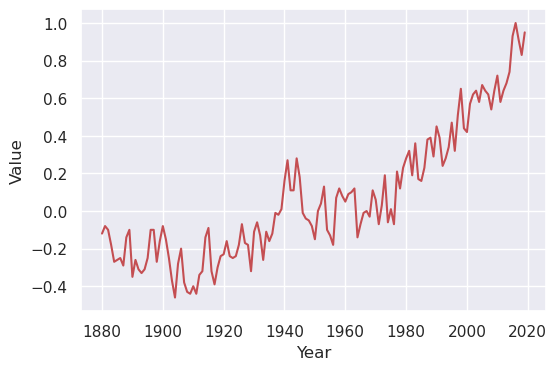

In [2]:
data = pd.read_csv('global_temp_data.csv')

# visualise Year-value relationship
year = data['Year'].to_numpy()
value = data['Value'].to_numpy()
plt.plot(year, value,'r')
plt.xlabel("Year"); plt.ylabel("Value")
plt.show()

Mean squared error: 0.014


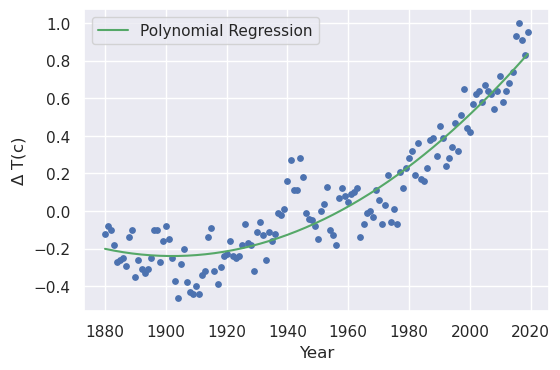

In [3]:
X = data['Year'].values.reshape(-1, 1)
y = data['Value']

Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)

pipe.fit(X, y)
poly_pred=pipe.predict(X)

#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(X, poly_pred))
X, poly_pred = zip(*sorted_zip)

# Compute RMSE
mse = mean_squared_error(y, poly_pred)
print('Mean squared error: %.3f'%mse)


#plotting predictions
plt.scatter(year, value,s=15)
plt.plot(X, poly_pred,color='g',label='Polynomial Regression')
plt.xlabel('Year');plt.ylabel(r'$\Delta$ T(c)')
plt.legend()
plt.show()

In [4]:
def poly_reg(deg, X_train, y_train):    
    
    Input = [('poly',PolynomialFeatures(degree=deg)),('lr',LinearRegression())]
    pipe = Pipeline(Input)
    model = pipe.fit(X_train,y_train)
    return model
    

Degree-1 polynomial MSE: 2.5898209586455763
Degree-2 polynomial MSE: 0.7242462956290858
Degree-3 polynomial MSE: 1.1789225588316068
Degree-4 polynomial MSE: 1.1715970841852223
Degree-5 polynomial MSE: 1.164357463128265
Degree-6 polynomial MSE: 1.1571940784813983
Degree-7 polynomial MSE: 1.150097448019709
Degree-8 polynomial MSE: 1.1430584234274304
Degree-9 polynomial MSE: 1.1360681641845116
Degree-10 polynomial MSE: 1.1291181117724427
Degree-11 polynomial MSE: 1.1221999651260963
Degree-12 polynomial MSE: 1.1153056571856463
Degree-13 polynomial MSE: 1.1084273325804712
Degree-14 polynomial MSE: 1.1015573262577196
Degree-15 polynomial MSE: 1.0946881430851056
Degree-16 polynomial MSE: 1.0883647999992507
Degree-17 polynomial MSE: 1.0825788339801399
Degree-18 polynomial MSE: 1.076778187591331
Degree-19 polynomial MSE: 1.0709531884552033
Degree-20 polynomial MSE: 1.0650942252908153


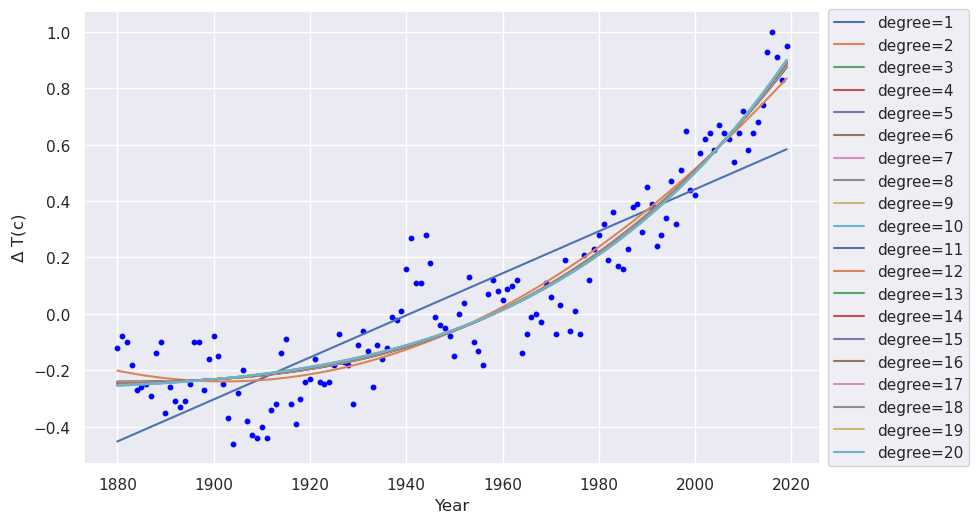

In [5]:
plt.figure(num=None, figsize=(9.5, 6), dpi=100, facecolor='w', edgecolor='k')
plt.scatter(year, value,color='blue', s=10)
lr = LinearRegression()

crossvalidation = KFold(n_splits=10, shuffle=False)

mean_cv_score = []

for deg in range(1,21):
    model  = poly_reg(deg, X, y)
    scores = cross_val_score(model, X, y, cv=crossvalidation)
    
    mse = np.mean(np.abs(scores))
    mean_cv_score.append(mse)
    print("Degree-"+str(deg)+" polynomial MSE: " + str(mse))
    
    y_pred = model.predict(X)
    plt.plot(X, y_pred, label='degree={0}'.format(deg))
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Year');plt.ylabel(r'$\Delta$ T(c)')
plt.show()

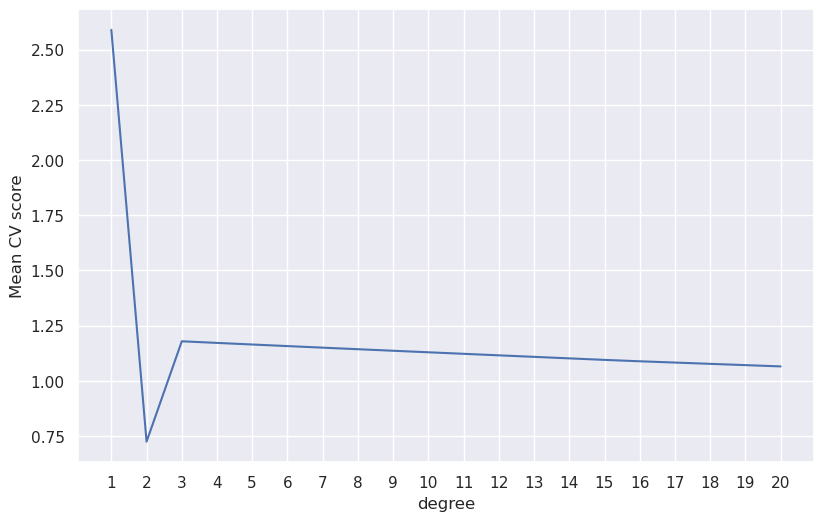

In [6]:
degree = list(range(1,21))

plt.figure(num=None, figsize=(9.5, 6), dpi=100, facecolor='w', edgecolor='k')
plt.xticks(degree)
plt.plot(degree, mean_cv_score)
plt.xlabel('degree')
plt.ylabel('Mean CV score');

**What is the degree of the polynomial?** <br>
Polynomial with degree 2 is the optimal polynomial model. We will train the model with degree 2 polynomial to predict temperature values for the years 1880-2040

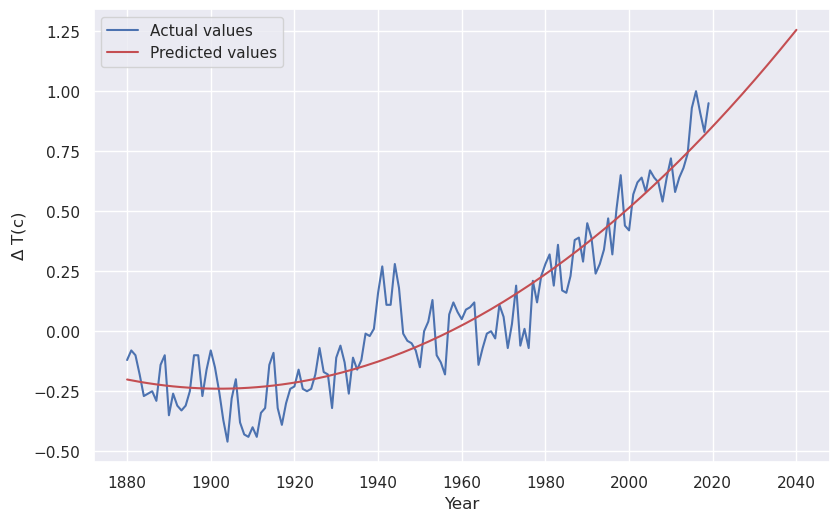

In [7]:

deg = 2 # Optimal polynomial model
X_test = np.arange(1880, 2041).reshape(-1, 1)
model  = poly_reg(deg, X, y)
plt.figure(num=None, figsize=(9.5, 6), dpi=100, facecolor='w', edgecolor='k')
y_test_pred = model.predict(X_test)
plt.plot(year, value,'b', label='Actual values')
plt.plot(X_test, y_test_pred,'r', label="Predicted values")
plt.xlabel("Year"); plt.ylabel(r'$\Delta$ T(c)')
plt.legend()
plt.show()

In [8]:
print("Expected temperature change in 2040: {:.3f} C".format(y_test_pred[-1]))

Expected temperature change in 2040: 1.255 C


In [9]:
# estimate of the error using RMSE
y_pred = model.predict(X)
rmse = mean_squared_error(y, y_pred, squared=False)
print("Error estimate for the prediction in temperature change in 2040: {:.3f}".format(rmse))


Error estimate for the prediction in temperature change in 2040: 0.119


## Mine or Rock Classification using Sonar Data

In [10]:
from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics, svm

In [11]:
data = pd.read_csv('sonar.csv')
df_train, df_test = train_test_split(data, 
                                     train_size = 0.8, 
                                     test_size = 0.2, 
                                     random_state = 10)

print(data.shape, df_train.shape, df_test.shape)
data.head()

(207, 61) (165, 61) (42, 61)


,0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.009,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [12]:
X_train = df_train.iloc[:, :-1]
y_train = df_train['R']

X_test = df_test.iloc[:, :-1]
y_test = df_test['R']

### 1. Perceptron

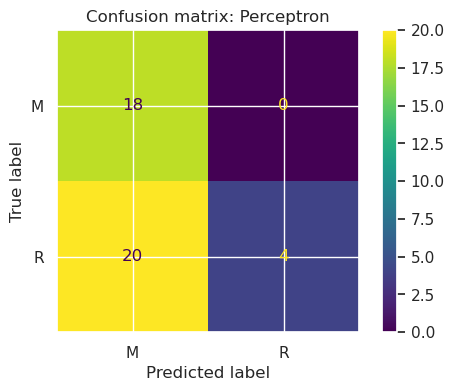

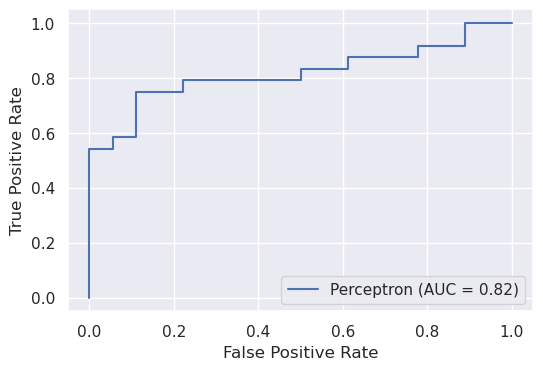

In [13]:
clf = Perceptron(tol=1e-3, random_state=0).fit(X_train, y_train)
disp = plot_confusion_matrix(clf, X_test, y_test)
disp.ax_.set_title("Confusion matrix: Perceptron")
metrics.plot_roc_curve(clf, X_test, y_test)

### 2. Logistic Regression


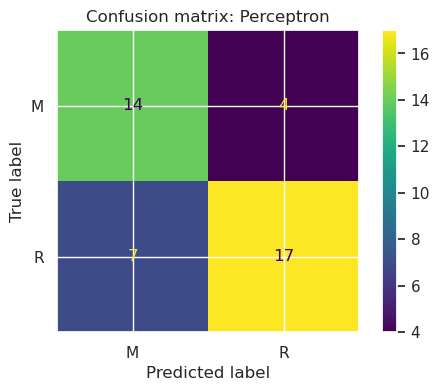

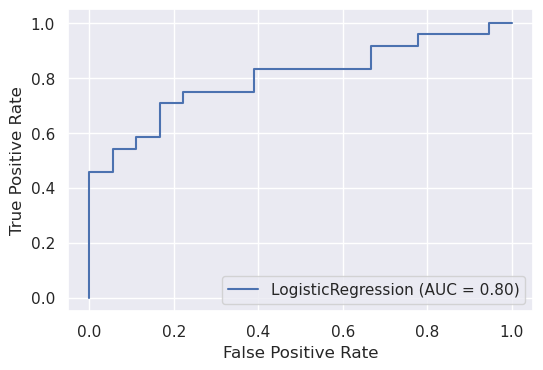

In [14]:
from sklearn.linear_model import LinearRegression, LogisticRegression


clf = LogisticRegression().fit(X_train, y_train)
disp = plot_confusion_matrix(clf, X_test, y_test)
disp.ax_.set_title("Confusion matrix: Perceptron")
metrics.plot_roc_curve(clf, X_test, y_test)

### 3. Linear Support Vector Machine

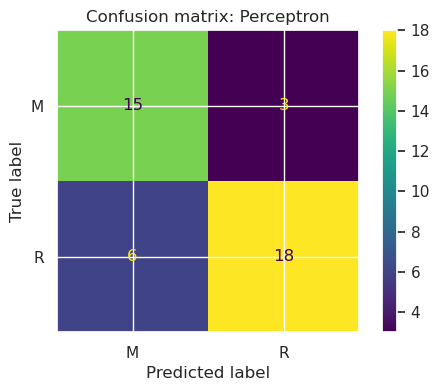

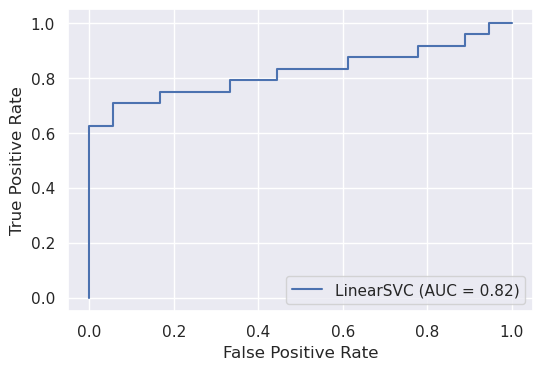

In [15]:
clf = LinearSVC(random_state=0, tol=1e-05).fit(X_train, y_train)
disp = plot_confusion_matrix(clf, X_test, y_test)
disp.ax_.set_title("Confusion matrix: Perceptron")
metrics.plot_roc_curve(clf, X_test, y_test)

### 4. Polynomial Support Vector Machine

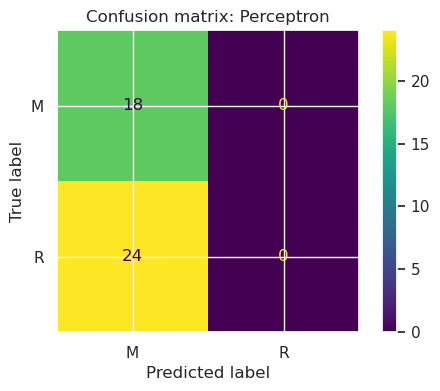

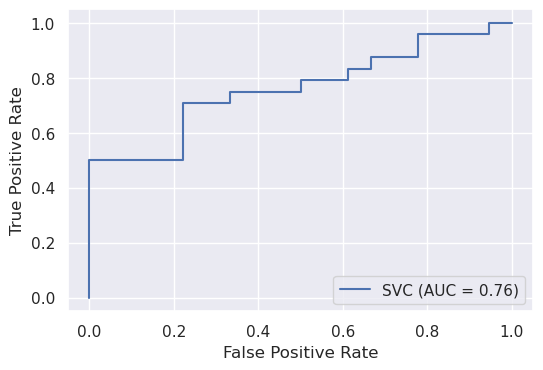

In [16]:
clf = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)
disp = plot_confusion_matrix(clf, X_test, y_test)
disp.ax_.set_title("Confusion matrix: Perceptron")
metrics.plot_roc_curve(clf, X_test, y_test)

**Which model is the best option for this dataset?** <br>
Higher the AUC, the better the model is at predicting 0s as 0s and 1s as 1s. Hence, perceptron and linear SVM seem to be the best option for this dataset.